In [1]:
from optosim.simulation.optical_photon_display import OpticalPhotonDisplay
from optosim.settings import CONFIG_DIR

import matplotlib.pyplot as plt
from IPython.display import clear_output

### Event display for individual photons

Event number: 8
x = [1.5 0.  0.8] t = [-0.52011046  0.63153239 -0.57502344] medium = 0
x = [0.77639756 0.87861793 0.        ] t = [-0.31714052  0.38508072 -0.86668029] medium = 1
x = [-1.00270017  3.03884721 -4.86191084] t = [-0.02569194 -0.49820196 -0.86668029] medium = 1
x = [-1.05718864  1.98224117 -6.7       ] t = [-0.01203851 -0.23344321 -0.97229591] medium = 3


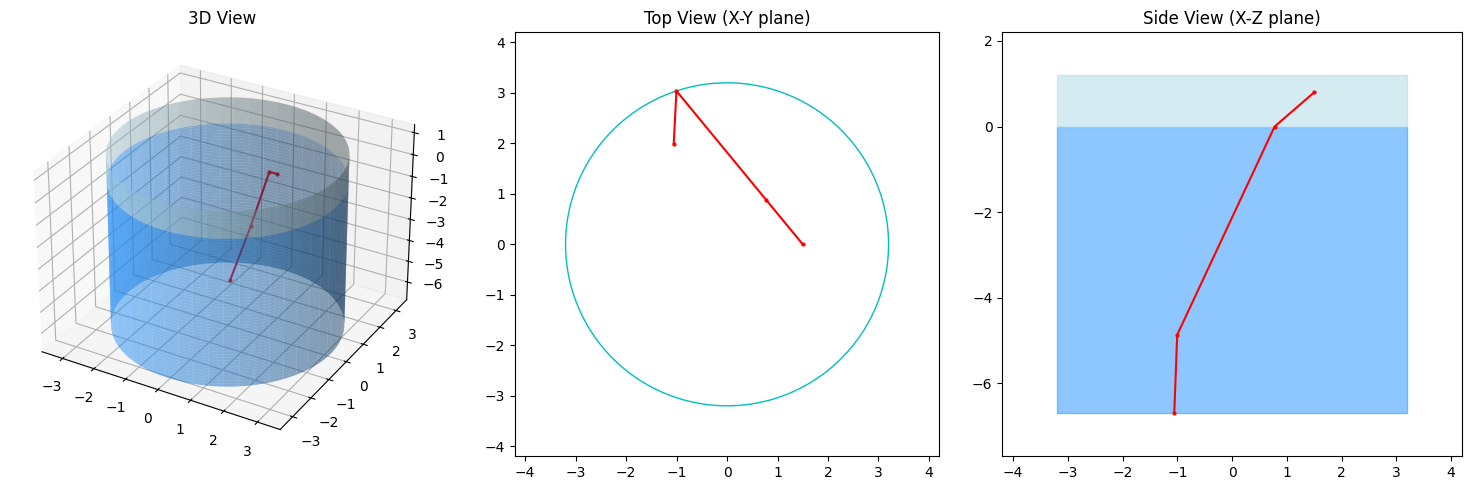

Quit the event display......


In [2]:
# Initialize the display class

config_file = CONFIG_DIR + '/config_example.json'

photon = OpticalPhotonDisplay(config_file=config_file)

# switch scattering on/off
photon.set_scattering(False)
# switch modeling on/off
photon.set_experimental_scatter_model(True)

iselect = -1

# set random seed
for i in range(10000):
    print('Event number:',i)
    photon.set_random_seed(12345+i)

    #
    # generate a photon
    #
    photon.generate_photon([1.5, 0, 0.5])  # Generate a photon at the center of the detector
    #
    # propogate the photon through the detetor
    #
    photon.propagate()

    
    if (iselect == -1) or (i == iselect):
        #
        # show the event
        #
        
        if photon.get_number_of_reflections() > -5:
            # photon.plot_3d_view_animation()
        
            photon.plot()

            response = input("Press Enter to continue to the next event or 'q' to quit...")
            if (response.lower() == 'q') or (iselect != -1):
                print("Quit the event display......")
                break
    
            clear_output(wait=True)
